In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
#from fancyimpute import KNN

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.drop(columns=['instant','dteday','casual','registered'],axis=1,inplace=True)

In [4]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [5]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [6]:
a=['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in a:
    df[i]=df[i].astype('category')

In [7]:
df.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [8]:
df['cnt']=df['cnt'].astype('float64')

In [9]:
df.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt            float64
dtype: object

In [10]:
a = df.select_dtypes('category').keys()
a

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

C:\Users\navnegup.CORP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\navnegup.CORP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\navnegup.CORP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

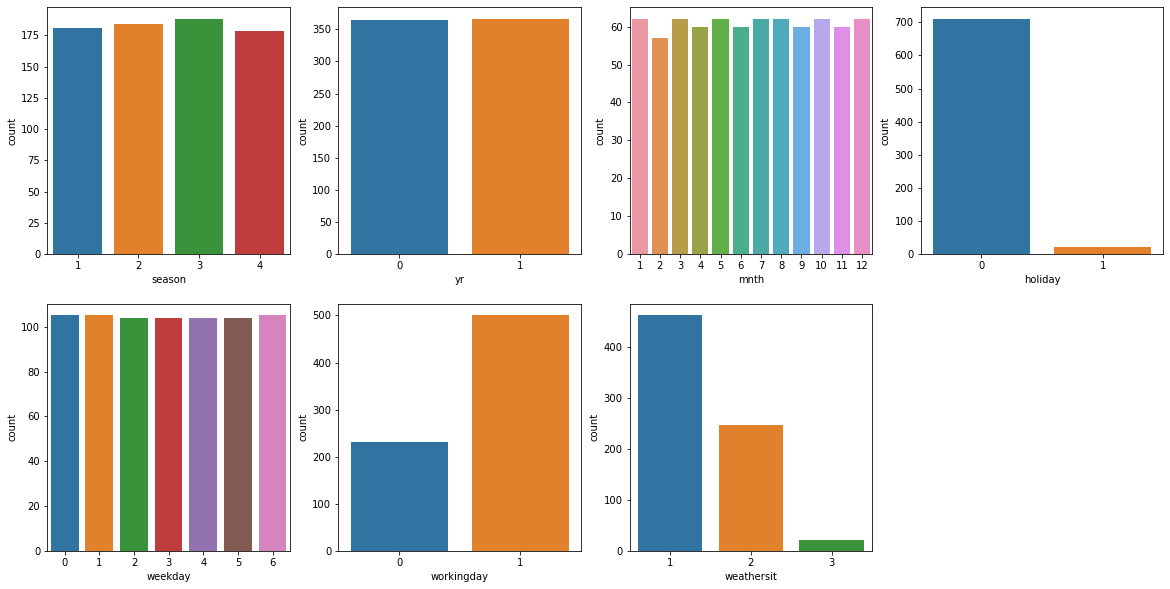

In [11]:
plt.figure(figsize=(20,10))
for i,var in enumerate(a):
    plt.subplot(2,4,i+1)
    sns.countplot(var,data=df)

In [12]:
a = df.select_dtypes('float64').keys()
a

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

-0.05440902480571618
-0.1308188980737412


C:\Users\navnegup.CORP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\navnegup.CORP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.06964015783152368
0.6759547264275362


C:\Users\navnegup.CORP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\navnegup.CORP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.04725555755362063


C:\Users\navnegup.CORP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


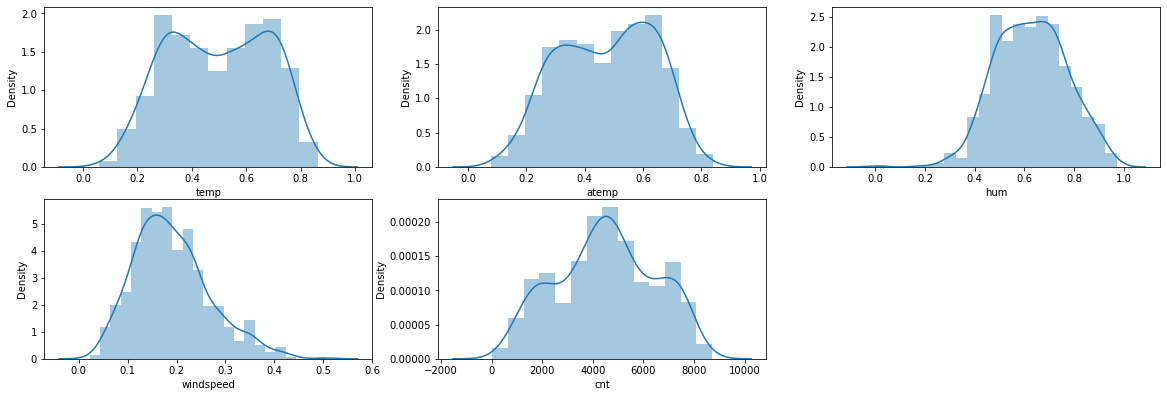

In [13]:
plt.figure(figsize=(20,10))
for i,var in enumerate(a):
    plt.subplot(3,3,i+1)
    print(skew(df[var]))
    sns.distplot(df[var])

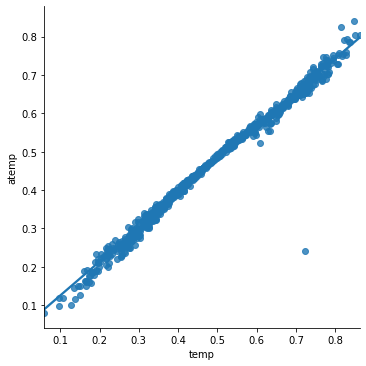

In [14]:
sns.lmplot(x='temp',y='atemp',data=df)

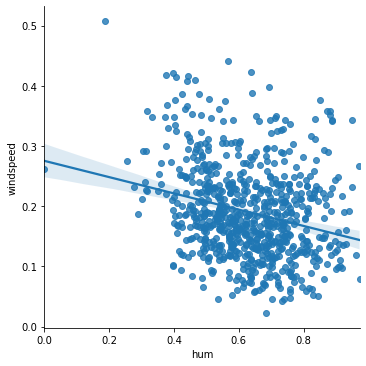

In [15]:
sns.lmplot(x='hum',y='windspeed',data=df)

<AxesSubplot:xlabel='mnth', ylabel='count'>

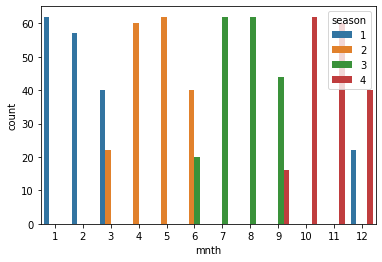

In [16]:
sns.countplot(x='mnth',hue='season',data=df)

In [17]:
df_week = pd.DataFrame(df.groupby(['weekday']).sum())
df_week

,temp,atemp,hum,windspeed,cnt
weekday,,,,,
0,50.780899,48.855211,65.904171,19.795638,444027.0
1,51.812183,49.829085,66.945536,20.022517,455503.0
2,52.445326,50.267030,66.750254,19.949832,469109.0
3,52.481064,50.087487,67.118276,19.524592,473048.0
4,52.451518,50.200829,63.387899,19.926720,485395.0
5,51.541302,48.995626,63.830598,19.384430,487790.0
6,50.613988,48.517498,65.053826,20.641691,477807.0


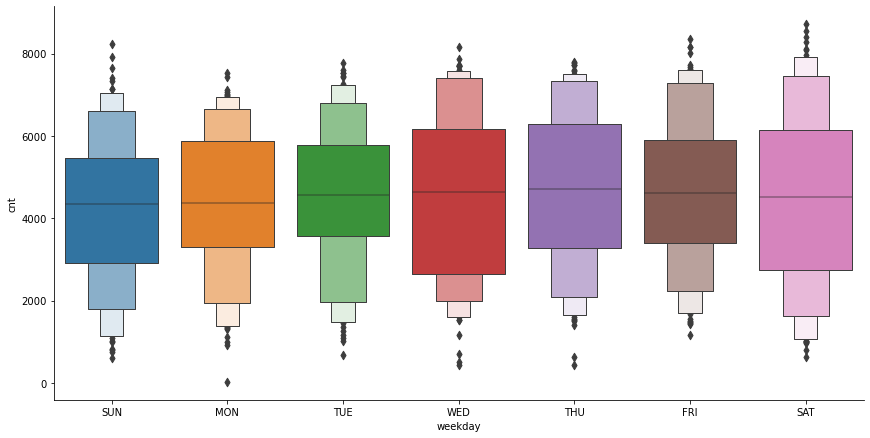

In [18]:
ax = sns.catplot(x="weekday", y="cnt", data=df.reset_index(), kind="boxen", height=6, aspect=2)
ax = ax.set_xticklabels(['SUN','MON','TUE','WED','THU','FRI','SAT'])

In [19]:
df_season=pd.DataFrame(df.groupby(['season']).sum())
df_season

,temp,atemp,hum,windspeed,cnt
season,,,,,
1,53.892306,53.741424,105.505427,38.831210,471348.0
2,100.170549,95.736548,115.358493,37.445312,918589.0
3,132.786150,123.308898,119.094627,32.353864,1061129.0
4,75.277275,73.965896,119.032013,30.615035,841613.0


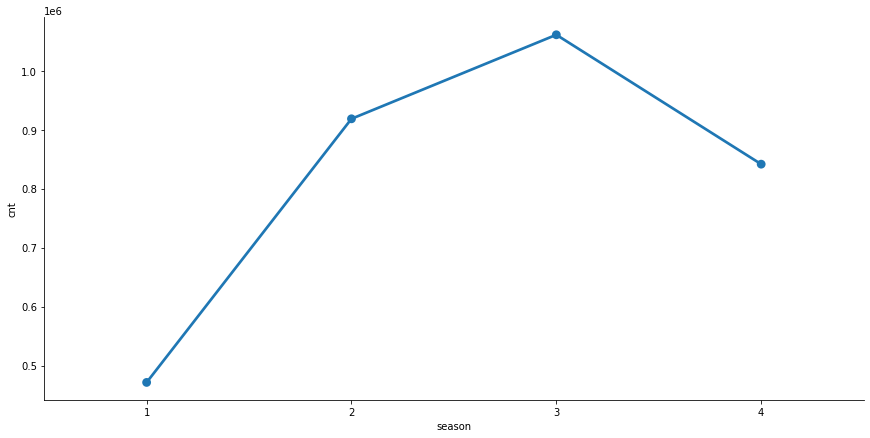

In [20]:
ax = sns.catplot(x="season", y="cnt", data=df_season.reset_index(), kind="point", height=6, aspect=2)

In [21]:
df_weather=pd.DataFrame(df.groupby(['weathersit']).sum())
df_weather

,temp,atemp,hum,windspeed,cnt
weathersit,,,,,
1,236.843696,226.220027,261.870203,88.086965,2257952.0
2,116.180341,111.858395,179.294035,46.048407,996858.0
3,9.102243,8.674344,17.826322,5.110049,37869.0


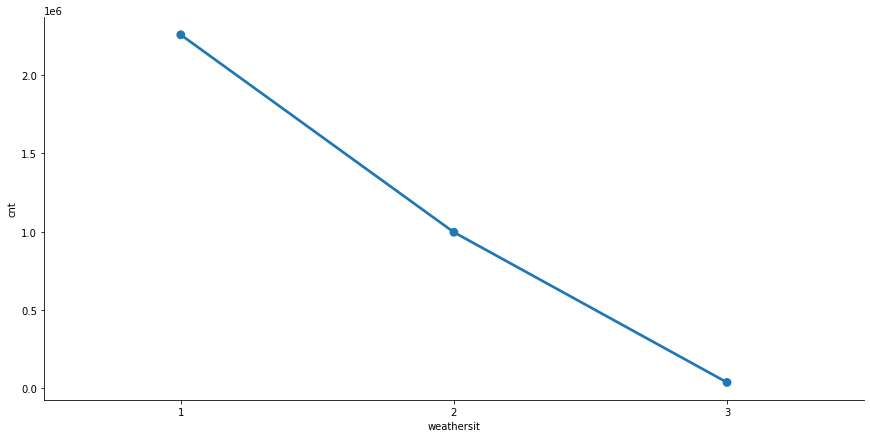

In [22]:
ax = sns.catplot(x="weathersit", y="cnt", data=df_weather.reset_index(), kind="point", height=6, aspect=2)

<AxesSubplot:>

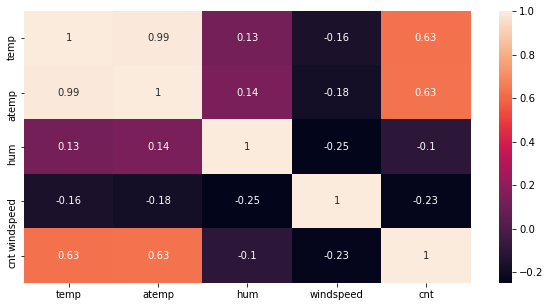

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [24]:
df.drop(columns=['atemp'],axis=1,inplace=True)

In [25]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600.0


<AxesSubplot:>

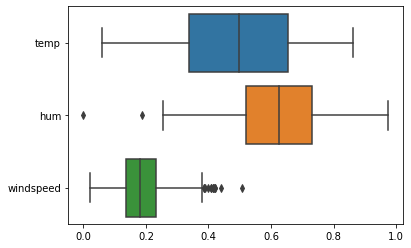

In [26]:

sns.boxplot(data=df.iloc[:,7:10], orient="h")

In [27]:
cnames = ['hum','windspeed','temp']

for i in cnames:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    
    iqr = q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    df.loc[df.loc[:,i] < min ,:i ] = np.nan
    df.loc[df.loc[:,i] > max ,:i ] = np.nan


In [28]:
df.isnull().sum()

season        14
yr            14
mnth          14
holiday       14
weekday       14
workingday    14
weathersit    14
temp          14
hum           14
windspeed     13
cnt            0
dtype: int64

In [29]:
a = df.select_dtypes('category').keys()
a

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [30]:
b = df.select_dtypes('float64').keys()
b

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [31]:
for i in a:
    if df[i].isnull().sum()>0:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        pass

In [32]:
for i in b:
    if df[i].isnull().sum()>0:
        df[i]=df[i].fillna(df[i].mean())
    else:
        pass

In [33]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [34]:
df.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
hum            float64
windspeed      float64
cnt            float64
dtype: object

<AxesSubplot:>

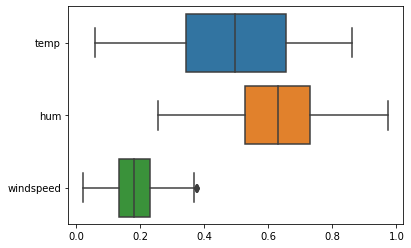

In [35]:
sns.boxplot(data=df.iloc[:,7:10], orient="h")

In [36]:
new_df=pd.get_dummies(df,drop_first=True)

In [37]:
new_df

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,801.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.652917,0.350133,2114.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
727,0.253333,0.590000,0.155471,3095.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
728,0.253333,0.752917,0.124383,1341.0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
729,0.255833,0.483333,0.350754,1796.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
new_df.dtypes

temp            float64
hum             float64
windspeed       float64
cnt             float64
season_2          uint8
season_3          uint8
season_4          uint8
yr_1              uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_6            uint8
mnth_7            uint8
mnth_8            uint8
mnth_9            uint8
mnth_10           uint8
mnth_11           uint8
mnth_12           uint8
holiday_1         uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
workingday_1      uint8
weathersit_2      uint8
weathersit_3      uint8
dtype: object

In [39]:
for i in range(0, new_df.shape[1]):
    if(new_df.iloc[:,i].dtypes == "uint8"):
        new_df.iloc[:,i] = new_df.iloc[:,i].astype('category')

In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   temp          731 non-null    float64 
 1   hum           731 non-null    float64 
 2   windspeed     731 non-null    float64 
 3   cnt           731 non-null    float64 
 4   season_2      731 non-null    category
 5   season_3      731 non-null    category
 6   season_4      731 non-null    category
 7   yr_1          731 non-null    category
 8   mnth_2        731 non-null    category
 9   mnth_3        731 non-null    category
 10  mnth_4        731 non-null    category
 11  mnth_5        731 non-null    category
 12  mnth_6        731 non-null    category
 13  mnth_7        731 non-null    category
 14  mnth_8        731 non-null    category
 15  mnth_9        731 non-null    category
 16  mnth_10       731 non-null    category
 17  mnth_11       731 non-null    category
 18  mnth_12   

In [41]:
from sklearn import metrics

In [42]:
X=df.drop('cnt',axis=1)
y=df['cnt']

In [43]:
X.shape

(731, 10)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred=lr.predict(X_test)

In [50]:
y_pred

array([3484.77962012, 4153.07656849, 3470.57575863, 3896.80284368,
       5180.24310689, 4238.86830974, 5107.24469862, 3621.04728347,
       6495.88355905, 4173.47881439, 5452.48585953, 3552.42726948,
       5296.88332441, 5223.89322743, 3687.69167754, 3600.74345197,
       2839.80151799, 3797.70023384, 7341.32405586, 6819.59724665,
       2493.74582553, 4655.08867338, 5360.47269511, 5476.10437546,
       3420.23981777, 4110.28163029, 5384.65491502, 6082.85784425,
       6372.85760179, 5672.93235581, 1192.00117663, 5808.15682733,
       5369.58644823, 3607.09928072, 6940.82036075, 6593.29652082,
       5711.17114699, 4312.13337429, 7987.21336057, 3327.45909219,
       2412.25989349, 2727.49211727, 5956.99612483, 2786.80154962,
       4124.67586064, 7210.90642004, 5408.88865982, 3125.17121298,
       8378.65894702, 5051.82147581, 2106.97930416, 2984.04268799,
       1372.17437632, 6079.77848987, 2458.93603116, 3989.38788727,
       3304.57788641, 5562.15472093, 5229.4957419 , 3509.79458

In [51]:
mape = np.mean(np.abs((y_test - y_pred)/ y_test))*100
mape

24.610351152242654

In [52]:
mse=np.mean((y_test-y_pred)**2)
rmse=np.sqrt(mse)
rmse

934.5635609755149

In [53]:
lin_data=pd.DataFrame({'actual':np.array(y_test,dtype=float),'pred':np.array(y_pred,dtype=float)})
lin_data

,actual,pred
0,4539.0,3484.779620
1,3542.0,4153.076568
2,1495.0,3470.575759
3,5020.0,3896.802844
4,5633.0,5180.243107
...,...,...
142,981.0,1481.319723
143,5046.0,4465.378766
144,3620.0,3644.583143
145,1635.0,3658.893548


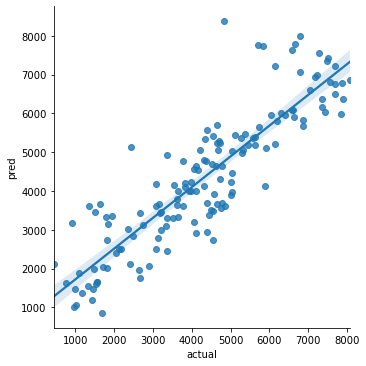

In [54]:
sns.lmplot(y='pred',x='actual',data=lin_data)

In [55]:
accuracy = 100-mape

In [56]:
accuracy

75.38964884775734

# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtr=DecisionTreeRegressor(max_depth=8,min_samples_split=10)

In [59]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=10)

In [60]:
y_pred = dtr.predict(X_test)

In [61]:
mape = np.mean(np.abs((y_test - y_pred)/ y_test))*100
mape

20.640430725580323

In [62]:
mse=np.mean((y_test-y_pred)**2)
rmse=np.sqrt(mse)
rmse

785.1025793726899

In [63]:
accuracy = 100-mape
accuracy

79.35956927441967

In [64]:
dtr_data=pd.DataFrame({'actual':np.array(y_test,dtype=float),'pred':np.array(y_pred,dtype=float)})
dtr_data

,actual,pred
0,4539.0,4878.014085
1,3542.0,4208.266667
2,1495.0,3642.722222
3,5020.0,4878.014085
4,5633.0,5714.833333
...,...,...
142,981.0,1052.000000
143,5046.0,4878.014085
144,3620.0,3642.722222
145,1635.0,3364.333333


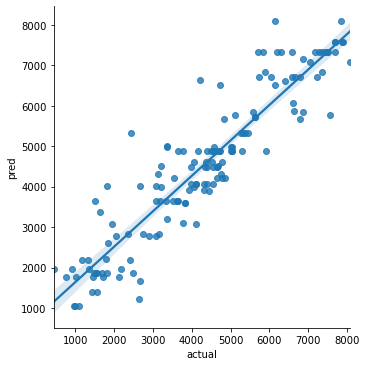

In [65]:
sns.lmplot(y='pred',x='actual',data=dtr_data)

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [68]:
mape_rfr = np.mean(np.abs((y_test - y_pred)/ y_test))*100
mape_rfr

18.746997200340335

In [69]:
mse_rfr=np.mean((y_test-y_pred)**2)
rmse_rfr=np.sqrt(mse_rfr)
rmse

785.1025793726899

In [70]:
rfr_data=pd.DataFrame({'actual':np.array(y_test,dtype=float),'pred':np.array(y_pred,dtype=float)})
rfr_data

,actual,pred
0,4539.0,4363.572503
1,3542.0,4248.559000
2,1495.0,3537.581000
3,5020.0,4793.700000
4,5633.0,5677.199000
...,...,...
142,981.0,1169.089000
143,5046.0,4779.767000
144,3620.0,3549.756000
145,1635.0,3381.864332


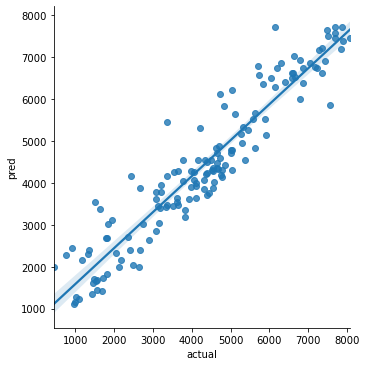

In [71]:
sns.lmplot(y='pred',x='actual',data=rfr_data)

# hyperparameter tuning


In [72]:
#random forest

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [77]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf   
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [78]:
rfr = RandomForestRegressor()

In [80]:
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter=10,cv=4, verbose=2, n_jobs=-1)

In [81]:
rfr_random.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   22.0s finished


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [84]:
print(rfr_random.best_params_)

{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}


In [85]:
rfr = RandomForestRegressor(n_estimators= 800, min_samples_split= 2, min_samples_leaf=2, max_features='auto', max_depth= 10)

In [86]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=800)

In [87]:
y_pred = rfr.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score

In [92]:
mape_rfr = np.mean(np.abs((y_test - y_pred)/ y_test))*100
mape_rfr

18.83233163078921

In [95]:
acc = 100-mape_rfr

In [96]:
acc

81.16766836921079

In [98]:
y_pred_tr = y_pred = rfr.predict(X_train)

In [100]:
mape_rfr_tr = np.mean(np.abs((y_train - y_pred_tr)/ y_train))*100
mape_rfr_tr

29.157356287788623

In [101]:
acc_tr = 100-mape_rfr_tr
acc_tr


70.84264371221138